In [14]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
import yfinance as yf  # Using yfinance instead of pandas_datareader
import datetime  # For date manipulation
import os  # For path handling

# Define the date range
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2020, 5, 31)

# Fetch data for the S&P 500 Index (ticker: ^GSPC) using yfinance
sp500_df = yf.download("^GSPC", start=start, end=end)

# Convert the index to string format 'YYYY-MM-DD' and create a new 'Date' column
sp500_df['Date'] = sp500_df.index.strftime('%Y-%m-%d')

# Reorder the columns to have 'Date' as the first column
sp500_df = sp500_df[['Date'] + [col for col in sp500_df.columns if col != 'Date']]

# Defining the path where the CSV file will be saved
save_path = r'S:\Projects\MH\ML\sp500_data.csv'

# Ensuring the directory exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)
sp500_df.to_csv(save_path, index=False)

# Confirmation
print(f"Data saved to {save_path}")

[*********************100%***********************]  1 of 1 completed

Data saved to S:\Projects\MH\ML\sp500_data.csv


In [17]:
pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 282.6/282.6 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import yellowbrick #Yellowbrick is the visualization library built from scikit-learn and matplotlib
import matplotlib.pyplot as plt # for plots
import seaborn as sns
import numpy as np
%matplotlib inline

In [20]:
sp500_df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-01-03,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [21]:
print("Describe Data")
sp500_df.describe()

Describe Data


,Open,High,Low,Close,Adj Close,Volume
count,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5.134000e+03
mean,1602.819156,1612.112133,1592.712434,1602.985835,1602.985835,3.139980e+09
std,613.513500,614.966674,611.797076,613.574299,613.574299,1.511303e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08
25%,1157.012482,1164.917542,1146.347534,1156.892487,1156.892487,1.698038e+09
50%,1369.869995,1380.304993,1361.320007,1369.760010,1369.760010,3.248630e+09
75%,2030.547485,2039.014984,2018.569977,2029.227539,2029.227539,3.952742e+09
max,3380.449951,3393.520020,3378.830078,3386.149902,3386.149902,1.145623e+10


In [22]:
print("Summarized Data")
sp500_df.describe(include=['O'])

Summarized Data


,Date
count,5134
unique,5134
top,2000-01-03
freq,1


In [23]:
sp500_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [24]:
sp500_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [26]:
import yfinance as yf  # Using yfinance instead of pandas_datareader
import pandas as pd
import datetime  # For date manipulation
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', '^GSPC']
start = datetime.datetime(2015, 4, 9)
end = datetime.datetime(2020, 4, 9)
top5_df = pd.DataFrame()
for ticker in tickers:
    df1 = yf.download(ticker, start=start, end=end)
    top5_df[ticker] = df1['Adj Close']
# Rename '^GSPC' to 'S&P500'
top5_df.rename(columns={'^GSPC': 'S&P500'}, inplace=True)
# Converting the index to string format 'YYYY-MM-DD' and create a new 'Date' column
top5_df['Date'] = top5_df.index.strftime('%Y-%m-%d')

# Reordering the columns to have 'Date' as the first column
top5_df = top5_df[['Date'] + [col for col in top5_df.columns if col != 'Date']]

# Displaying the first few rows of the DataFrame
top5_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Date,AAPL,MSFT,GOOGL,AMZN,META,S&P500
Date,,,,,,,
2015-04-09,2015-04-09,28.326555,35.943878,27.369587,19.177000,82.001495,2091.179932
2015-04-10,2015-04-10,28.447412,36.151836,27.395559,19.132500,81.871758,2102.060059
2015-04-13,2015-04-13,28.391468,36.186497,27.400553,19.118000,82.839767,2092.429932
2015-04-14,2015-04-14,28.268358,36.091179,26.958061,19.255501,83.348717,2095.840088
2015-04-15,2015-04-15,28.375799,36.619762,27.020988,19.172501,82.540382,2106.629883


Text(0.5, 1.0, 'Big 5 stocks and S&P 500 Returns in last 5 Years')

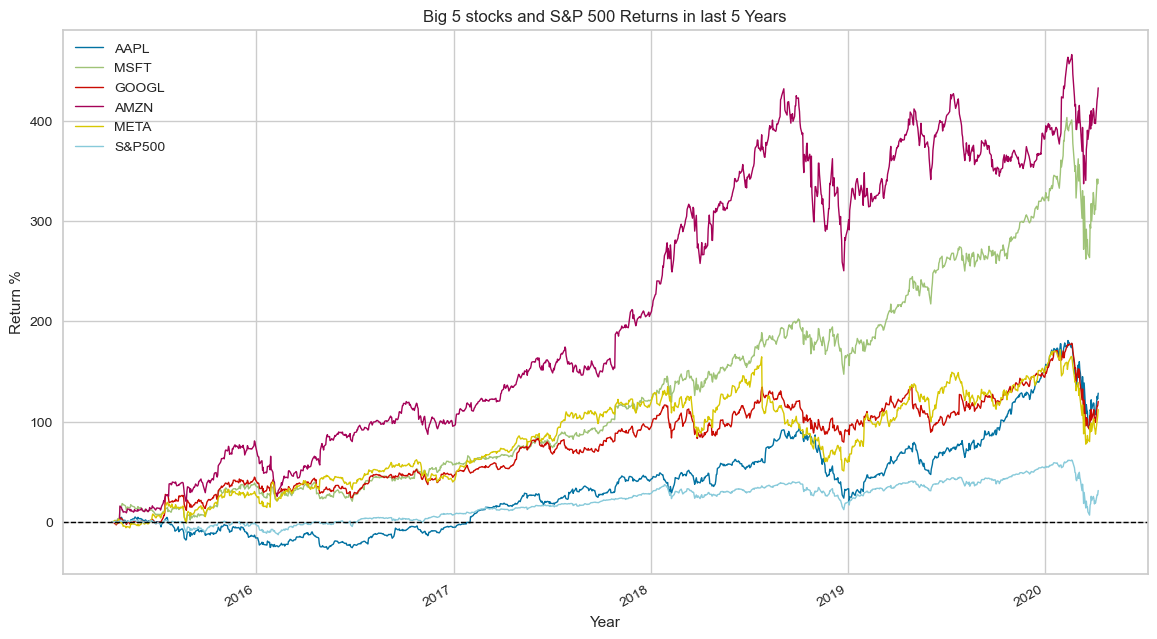

In [27]:
top5_df_dup = top5_df.copy() # make a copy of the close dataframe to make changes

# Removing date field 
top5_df_dup = top5_df_dup.drop(['Date'],axis=1)

# Calculating a Simple return
top5_df_dup = (top5_df_dup - top5_df_dup.iloc[0, :])/top5_df_dup.iloc[0, :]*100 

# plot the rate of return over time
top5_df_dup.plot(legend=True, figsize=(14, 8), linewidth=1)
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=1)
plt.xlabel('Year')
plt.ylabel('Return %')
plt.title('Big 5 stocks and S&P 500 Returns in last 5 Years')

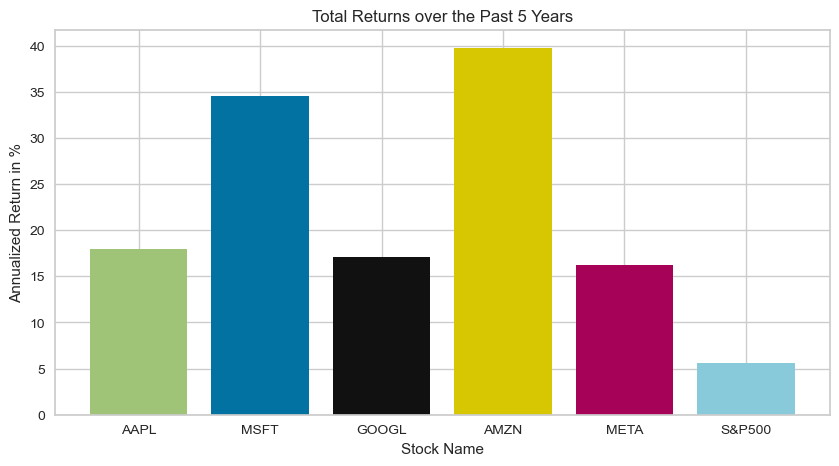

In [34]:
import matplotlib.pyplot as plt
# Initializing a dictionary to store annualized returns
annual_retn = {}
# Calculate the annualized return for each stock over the last 5 years
for t in top5_df_dup.columns:
    # Calculate annualized return
    annual_retn[t] = ((top5_df_dup[t][-1] / 100 + 1) ** (1/5) - 1) * 100
# Extract the annualized returns into a list
annual_retn_values = list(annual_retn.values())
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(annual_retn.keys(), annual_retn_values, color=['g', 'b', 'k', 'y', 'm', 'c', 'r'])
# Set the labels and title of the plot
plt.xlabel('Stock Name')
plt.ylabel('Annualized Return in %')
plt.title('Total Returns over the Past 5 Years')
# For display the plot
plt.show()

In [30]:
daily_close = sp500_df['Adj Close']
# Daily returns percentage change
sp500_df['Return'] = 100 * (sp500_df['Adj Close'].pct_change())
# Rounding the change to 2 digits after decimal
daily_pct_chg = round(sp500_df['Return'],2)
daily_pct_chg.head()

Date
2000-01-03     NaN
2000-01-04   -3.83
2000-01-05    0.19
2000-01-06    0.10
2000-01-07    2.71
Name: Return, dtype: float64

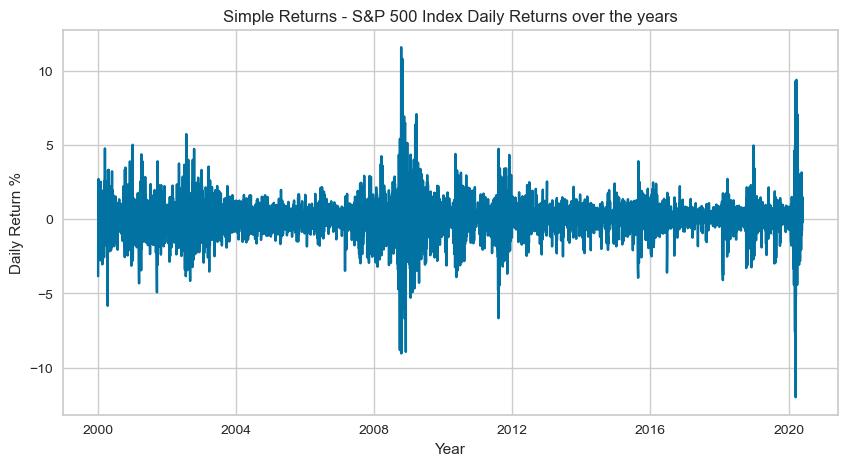

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(sp500_df['Return'], color='b')
plt.xlabel('Year')
plt.ylabel('Daily Return %')
plt.title('Simple Returns - S&P 500 Index Daily Returns over the years')
plt.show()

In [32]:
sp500_df['Return'].describe()

count    5133.000000
mean        0.022269
std         1.254991
min       -11.984055
25%        -0.478746
50%         0.055165
75%         0.572141
max        11.580037
Name: Return, dtype: float64